<a href="https://colab.research.google.com/github/erickchavarria95/NLP-Get_Data_From_Images/blob/main/INE_Erick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Clean Image

In [ ]:
#!pip install pytesseract
#!pip install opencv-python
#!pip install pdf2image

In [ ]:
#!apt-get install poppler-utils 
#!pip install pdf2image


In [ ]:
#from pdf2image import convert_from_path

#pdfs = '/content/drive/MyDrive/NLP/PDF/INE.pdf'
#pages = convert_from_path(pdfs, 200)

#i = 1
#for page in pages:
    #image_name = "Page_" + str(i) + ".jpg"
    #page.save(image_name, "JPEG")
    #i = i+1

In [ ]:
# use this command to install open cv2
#!pip install opencv-python

# use this command to install matplotlib
#!pip install matplotlib

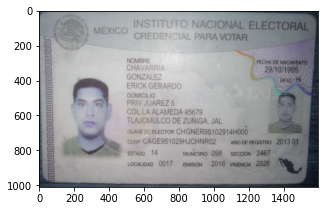

In [257]:
img = cv.imread('/content/drive/MyDrive/NLP/PDF/IMAGE_FLASH.jpeg',1)
plt.figure(figsize=(5,5))
plt.imshow(img)

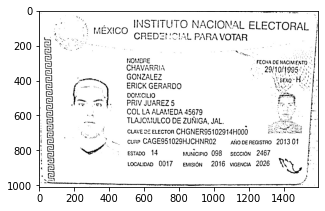

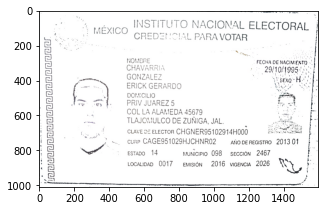

In [258]:
import cv2
import numpy as np

# read image
img = cv2.imread('/content/drive/MyDrive/NLP/PDF/IMAGE_FLASH.jpeg')

# convert img to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# do adaptive threshold on gray image
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 15)

# make background of input white where thresh is white
result = img.copy()
result[thresh==255] = (255,255,255)

# write results to disk
cv2.imwrite("math_diagram_threshold.jpg", thresh)
cv2.imwrite("math_diagram_processed.jpg", result)

img1 = cv.imread("math_diagram_threshold.jpg",1)
img2 = cv.imread("math_diagram_processed.jpg",1)
plt.figure(figsize=(5,5))
plt.imshow(img1)
plt.figure(figsize=(5,5))
plt.imshow(img2)

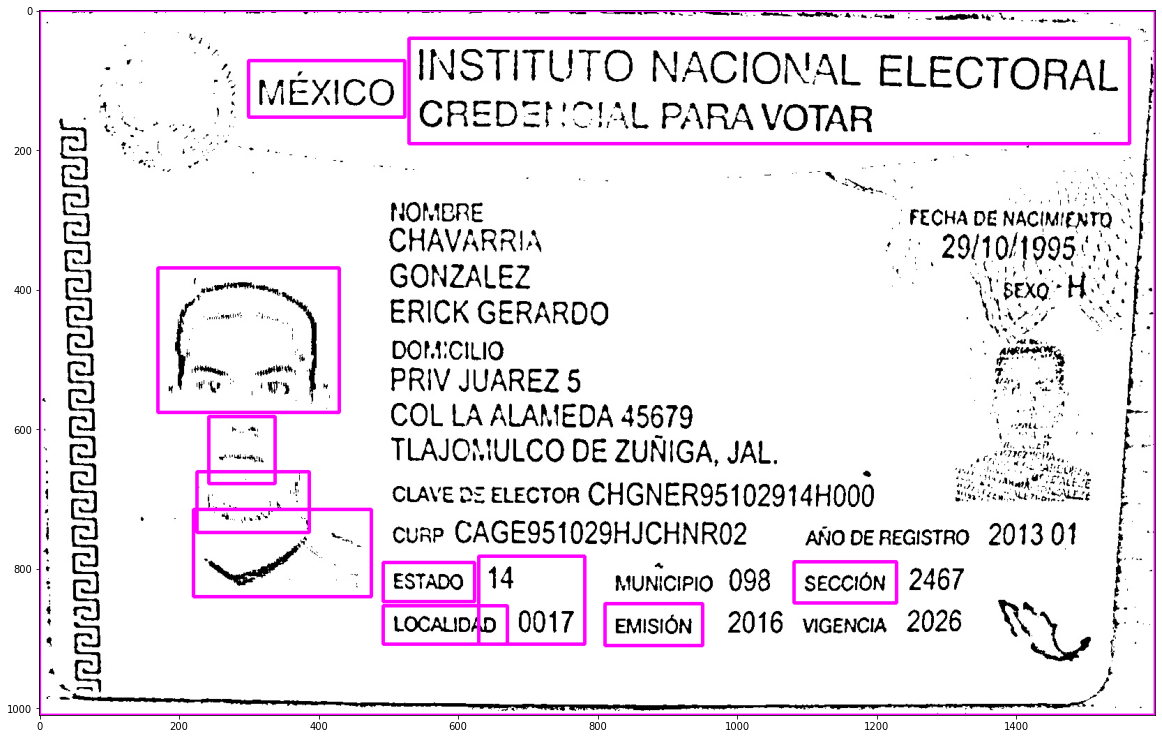

In [259]:
import cv2
import matplotlib.pyplot as plt

import cv2

def mark_region(image_path):
    
    image = cv2.imread(image_path)

    # define threshold of regions to ignore
    THRESHOLD_REGION_IGNORE = 40

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (9,9), 0)
    thresh = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,11,30)

    # Dilate to combine adjacent text contours
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9,9))
    dilate = cv2.dilate(thresh, kernel, iterations=4)

    # Find contours, highlight text areas, and extract ROIs
    cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]

    line_items_coordinates = []
    for c in cnts:
        area = cv2.contourArea(c)
        x, y, w, h = cv2.boundingRect(c)
        
        if w < THRESHOLD_REGION_IGNORE or h < THRESHOLD_REGION_IGNORE:
            continue
        
        image = cv2.rectangle(image, (x,y), (x+w, y+h), color=(255,0,255), thickness=3)
        line_items_coordinates.append([(x,y), (x+w, y+h)])

    return image, line_items_coordinates

FILENAME = "math_diagram_threshold.jpg" # <--- change this to be the file you want
image, line_items_coordinates = mark_region(FILENAME)
plt.figure(figsize=(20,20))
plt.imshow(image)
plt.savefig('/content/image-with-regions.png') # <--- added this to output an image

#1. Erosion
#####The basic idea of erosion is just like soil erosion only, it erodes away the boundaries of foreground object (Always try to keep foreground in white). So what it does? The kernel slides through the image (as in 2D convolution). A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, otherwise it is eroded (made to zero).

#####So what happends is that, all the pixels near boundary will be discarded depending upon the size of kernel. So the thickness or size of the foreground object decreases or simply white region decreases in the image. It is useful for removing small white noises (as we have seen in colorspace chapter), detach two connected objects etc.

#####Here, as an example, I would use a 5x5 kernel with full of ones. Let's see it how it works:

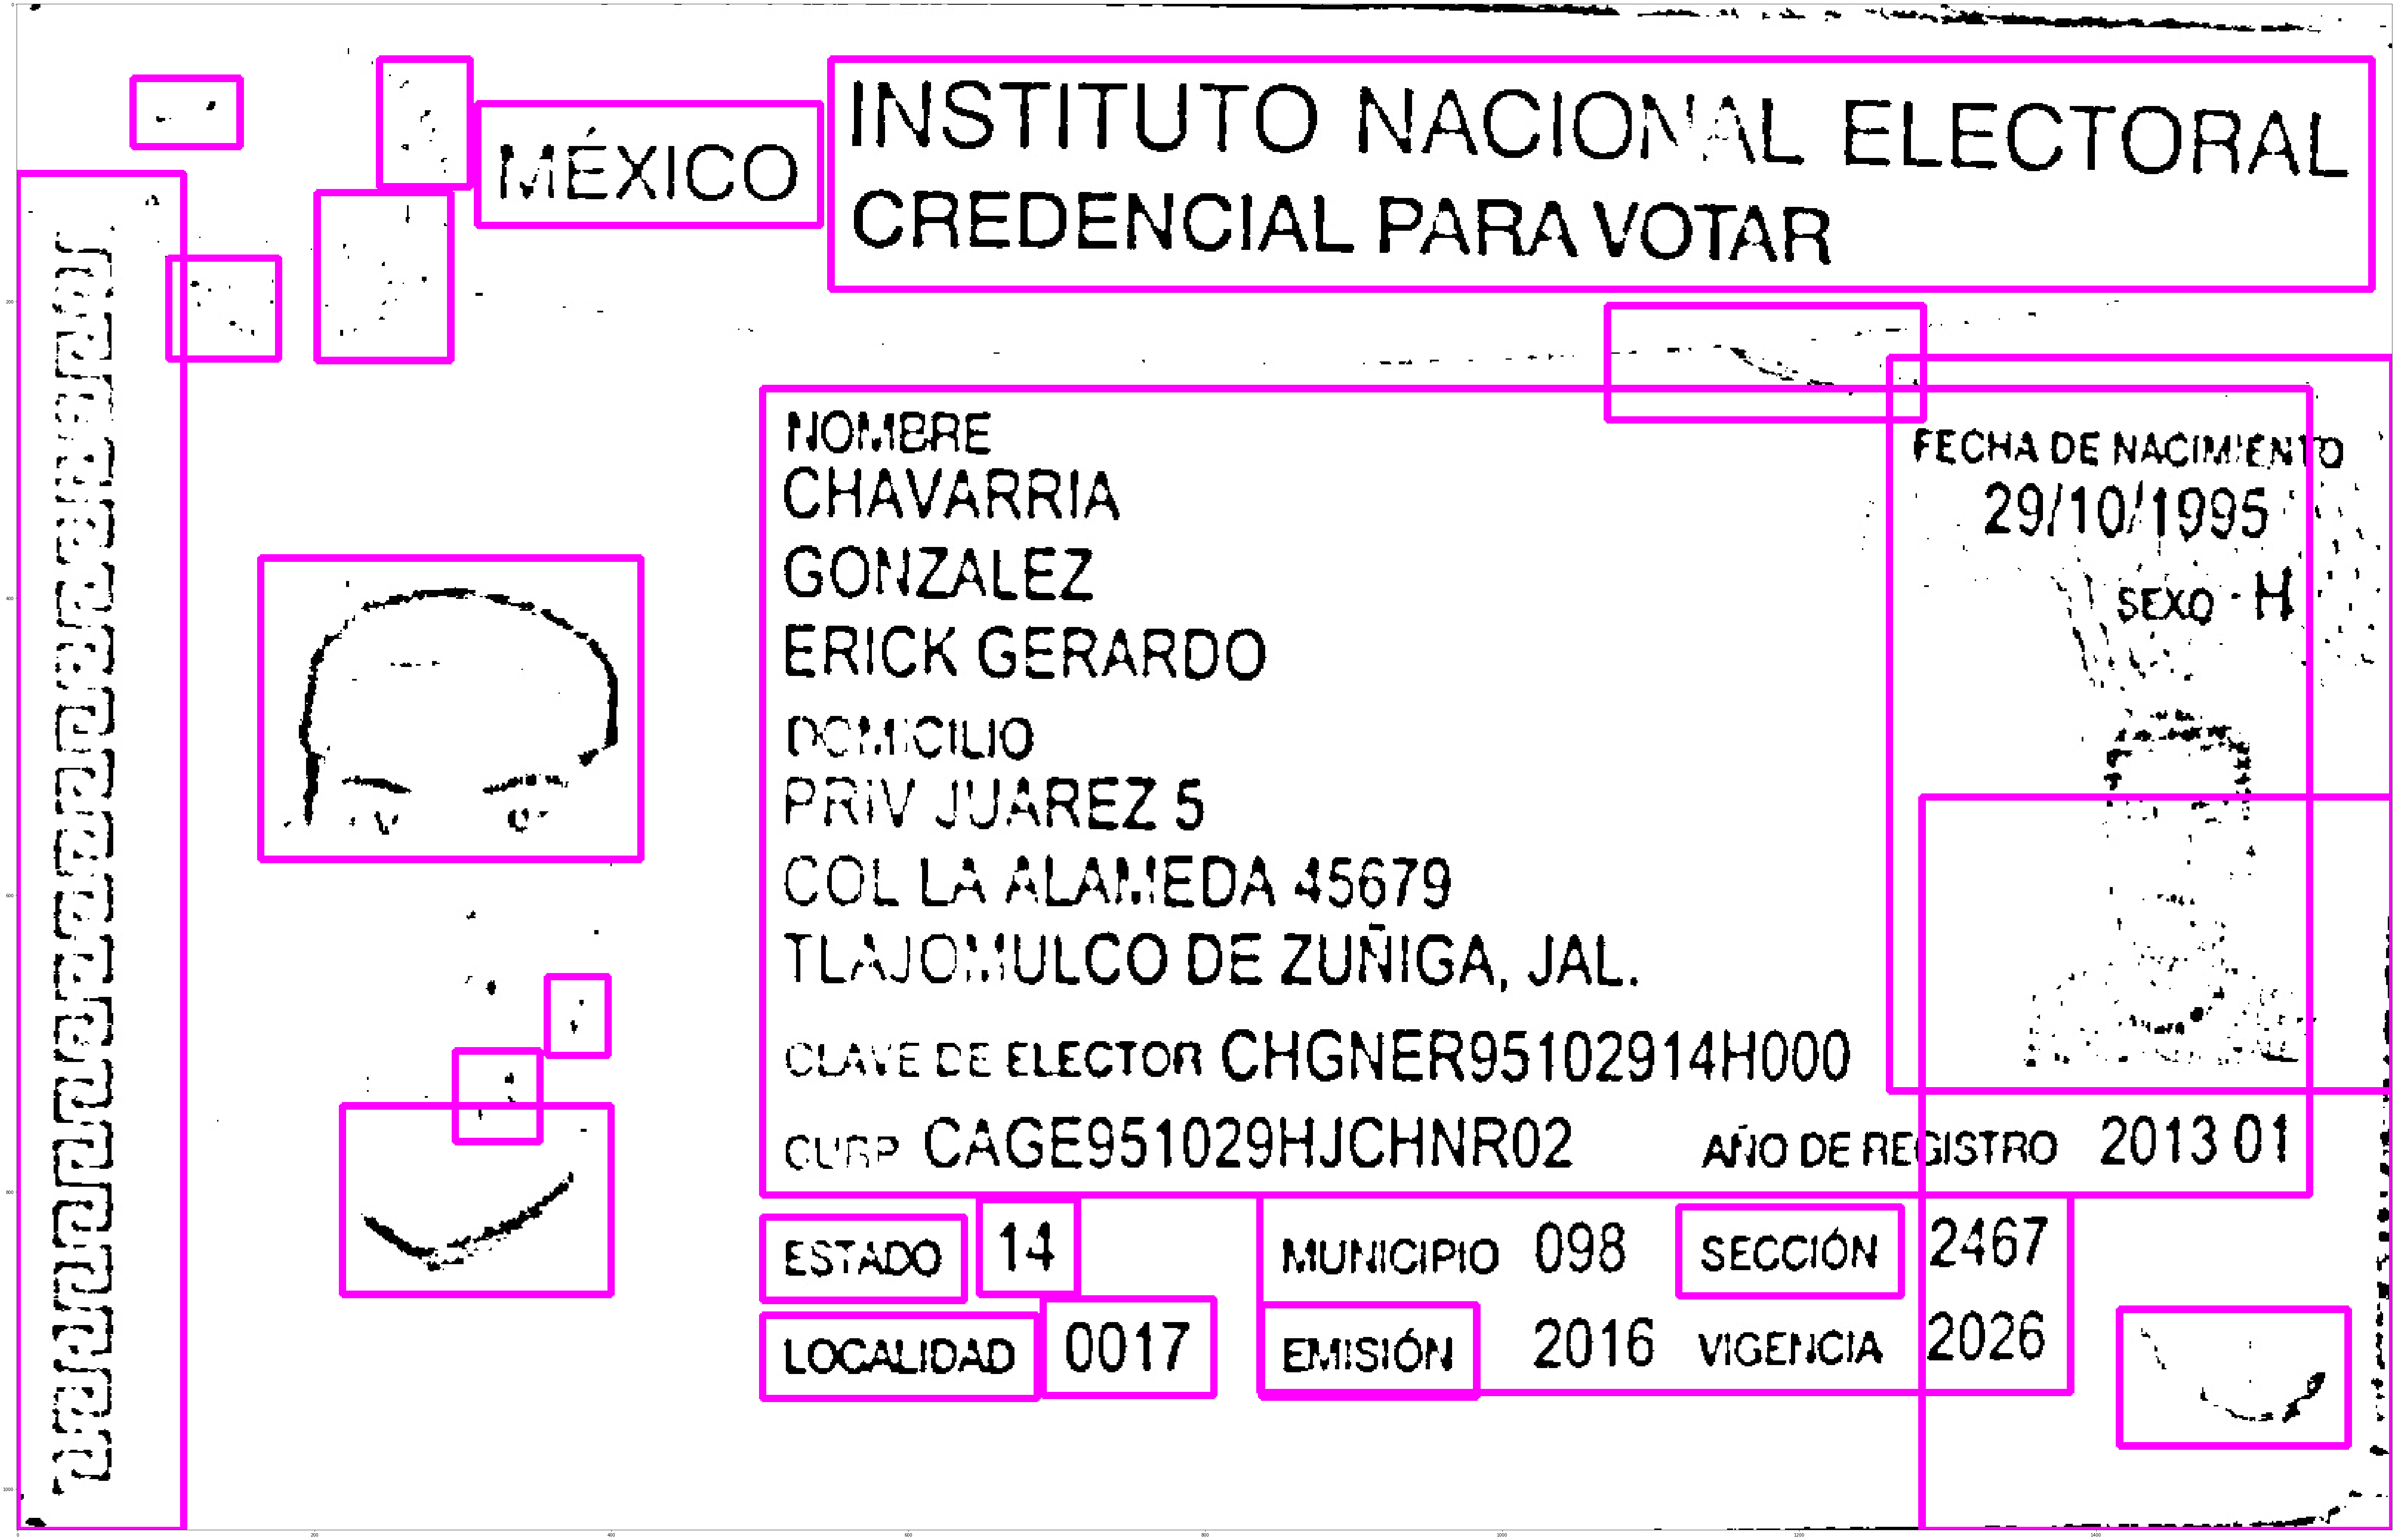

In [243]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img = cv.imread('/content/drive/MyDrive/NLP/PDF/INEPhoto1.jpeg',0)
kernel = np.ones((5,5),np.uint8)
erosion = cv.erode(img,kernel,iterations = 1)
plt.figure(figsize=(100,100))
plt.imshow(image)

#2. Dilation
#####It is just opposite of erosion. Here, a pixel element is '1' if atleast one pixel under the kernel is '1'. So it increases the white region in the image or size of foreground object increases. Normally, in cases like noise removal, erosion is followed by dilation. Because, erosion removes white noises, but it also shrinks our object. So we dilate it. Since noise is gone, they won't come back, but our object area increases. It is also useful in joining broken parts of an object.

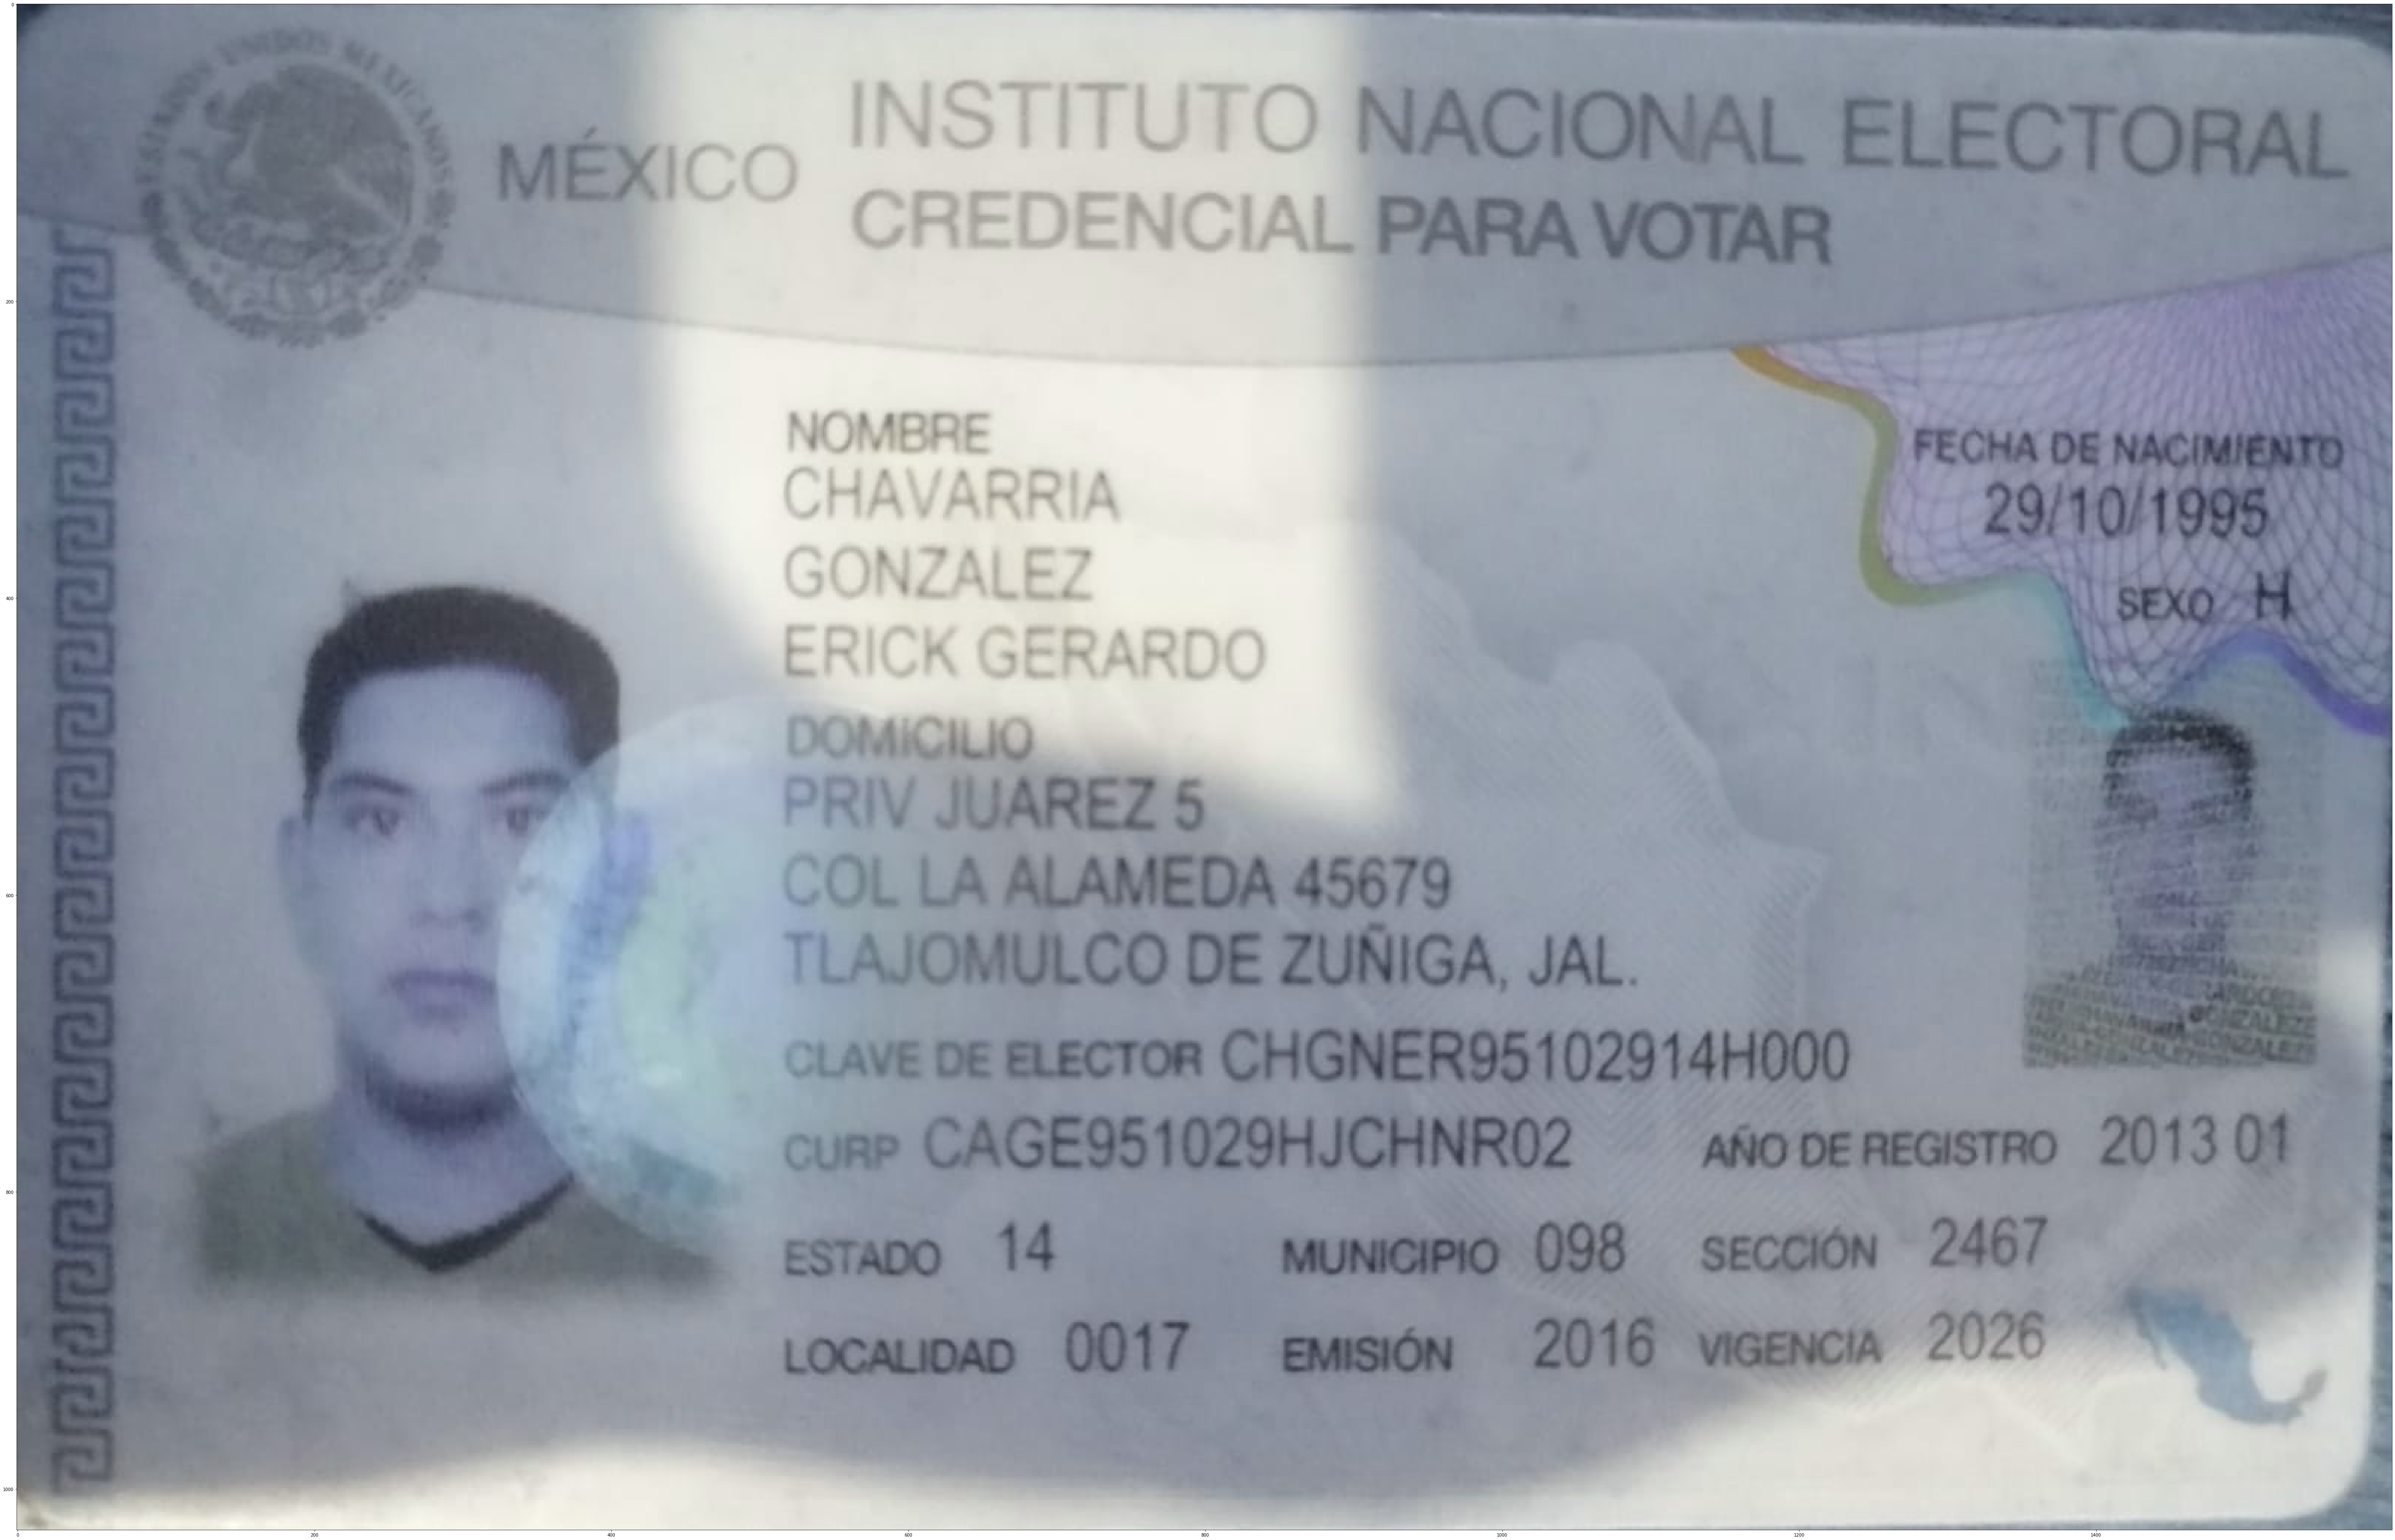

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img = cv.imread('/content/image-with-regions.png',0)
kernel = np.ones((5,5),np.uint8)
dilation = cv.dilate(img,kernel,iterations = 1)
plt.figure(figsize=(100,100))
plt.imshow(image)

#3. Opening
#####Opening is just another name of erosion followed by dilation. It is useful in removing noise, as we explained above. Here we use the function, cv.morphologyEx()

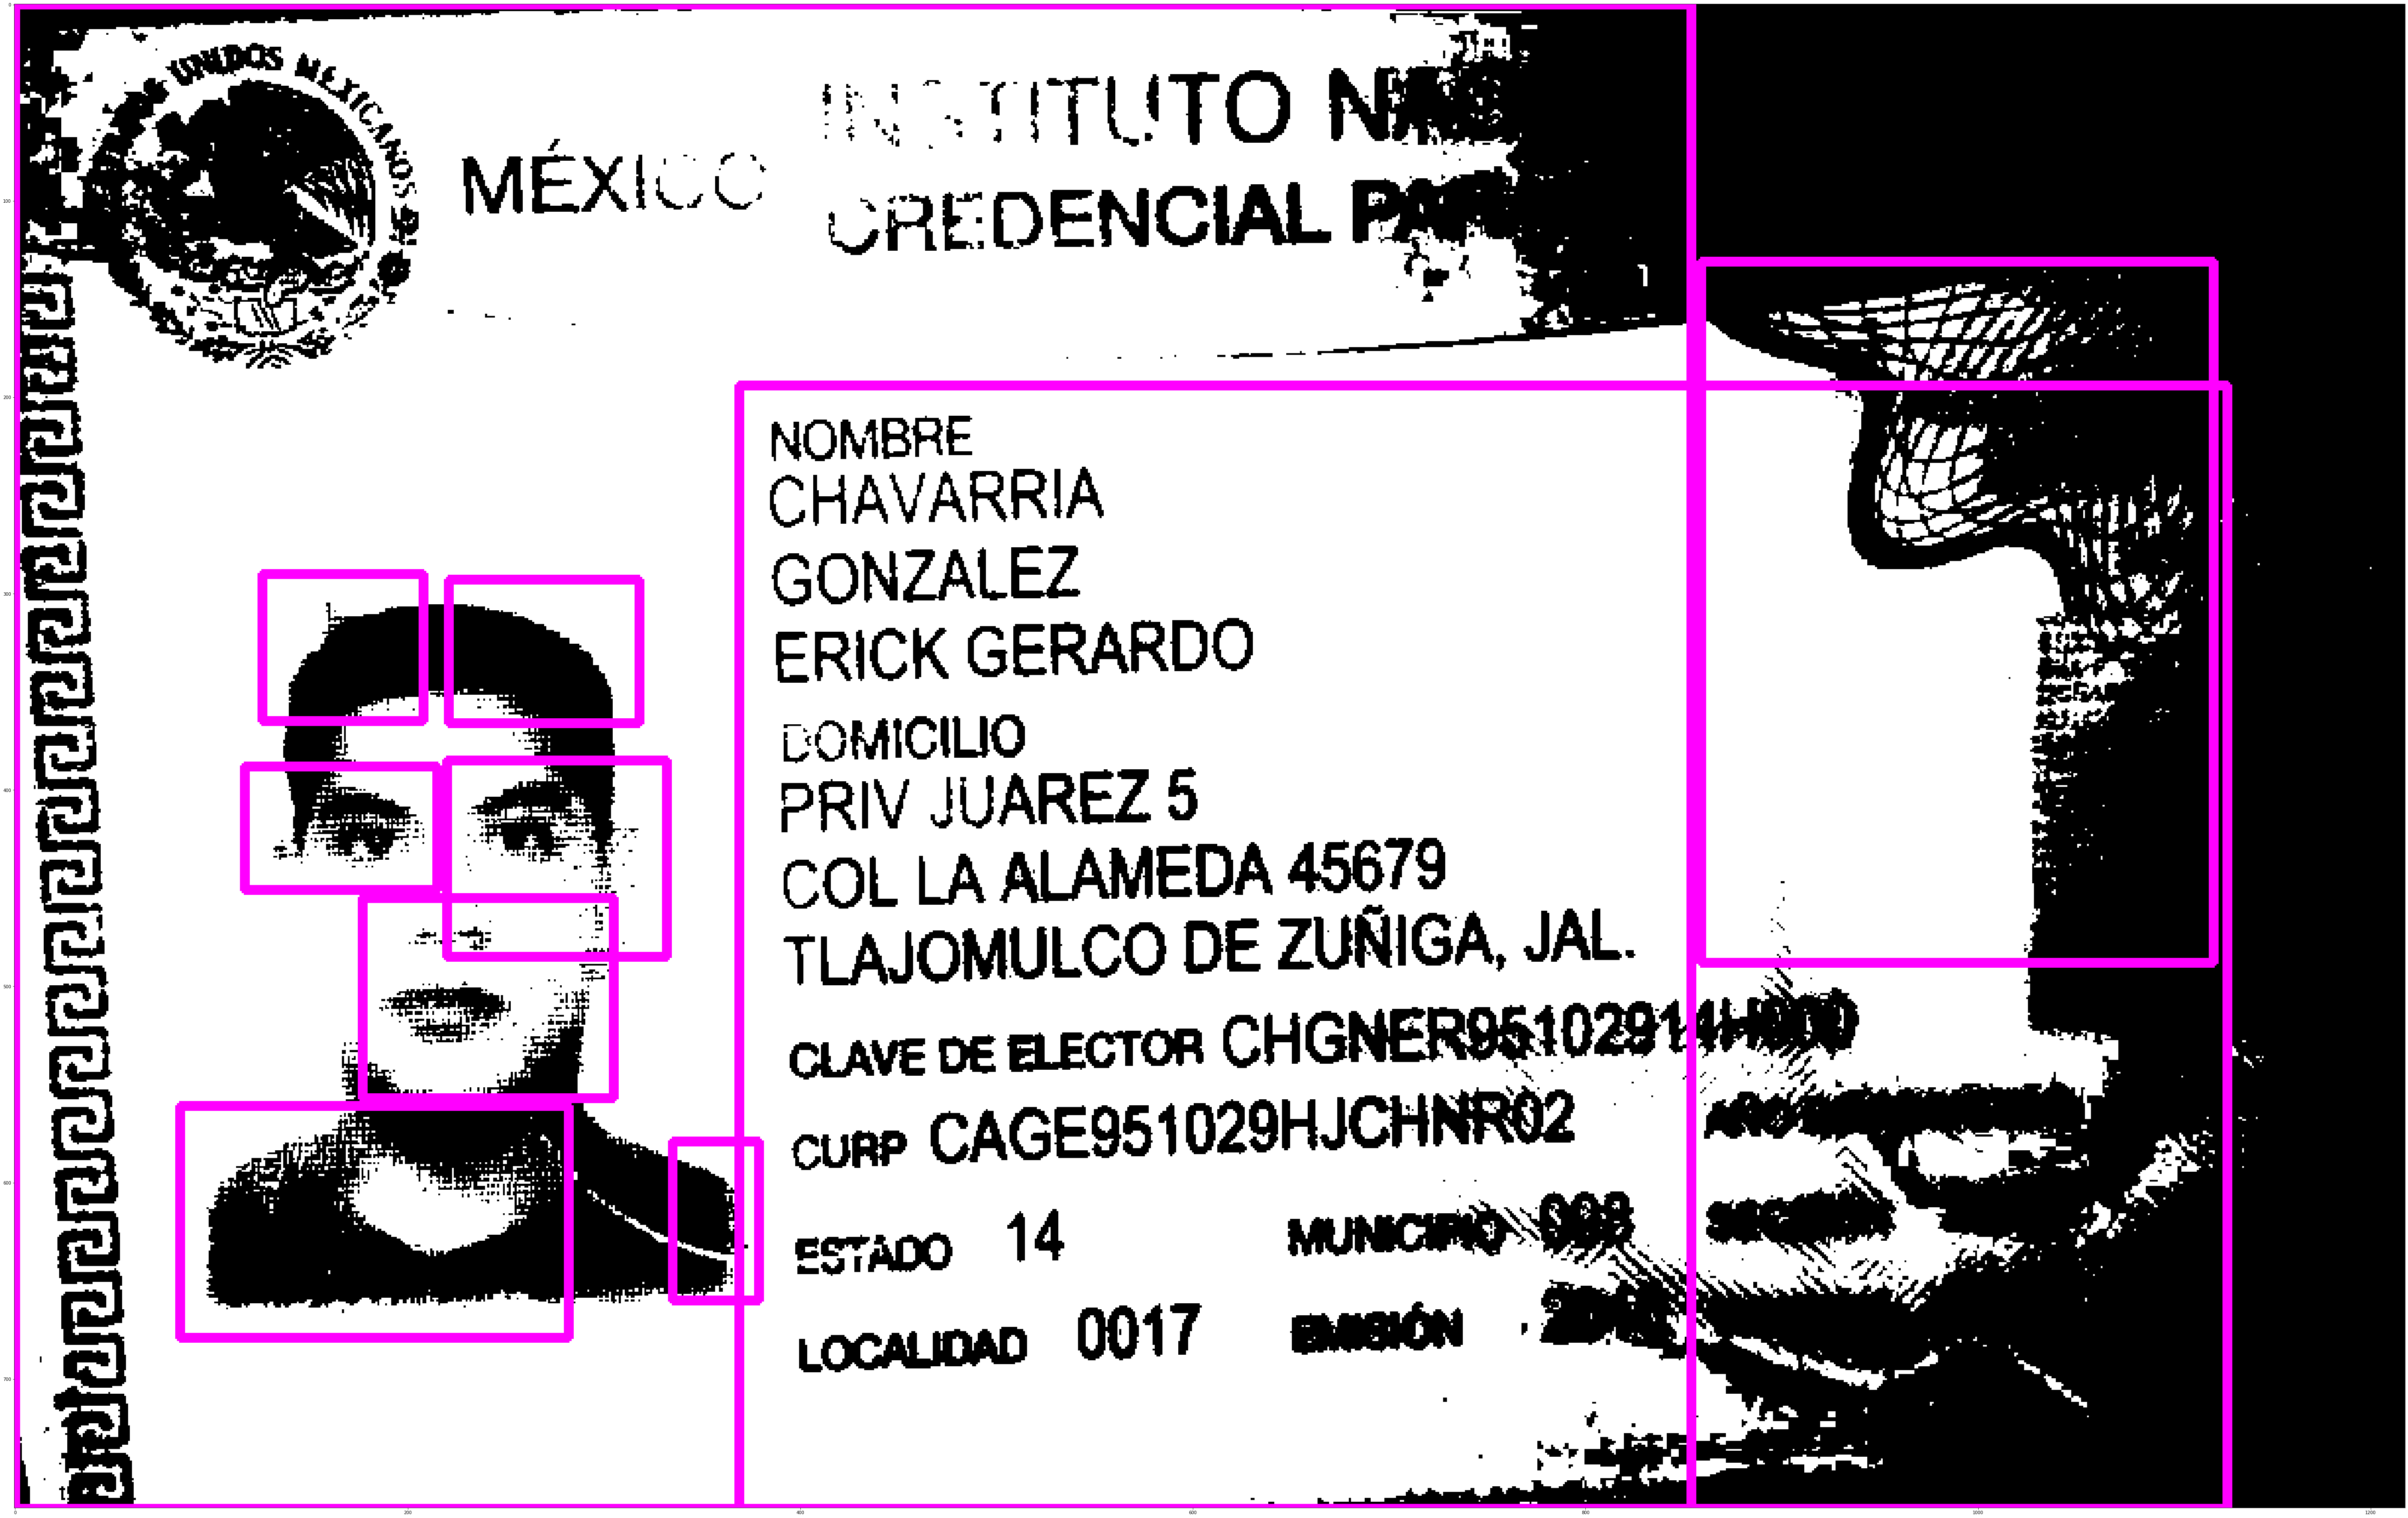

In [143]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img = cv.imread('/content/image-with-regions.png',0)
kernel = np.ones((5,5),np.uint8)
opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)
plt.figure(figsize=(100,100))
plt.imshow(image)

#4. Closing
#####Closing is reverse of Opening, Dilation followed by Erosion. It is useful in closing small holes inside the foreground objects, or small black points on the object.

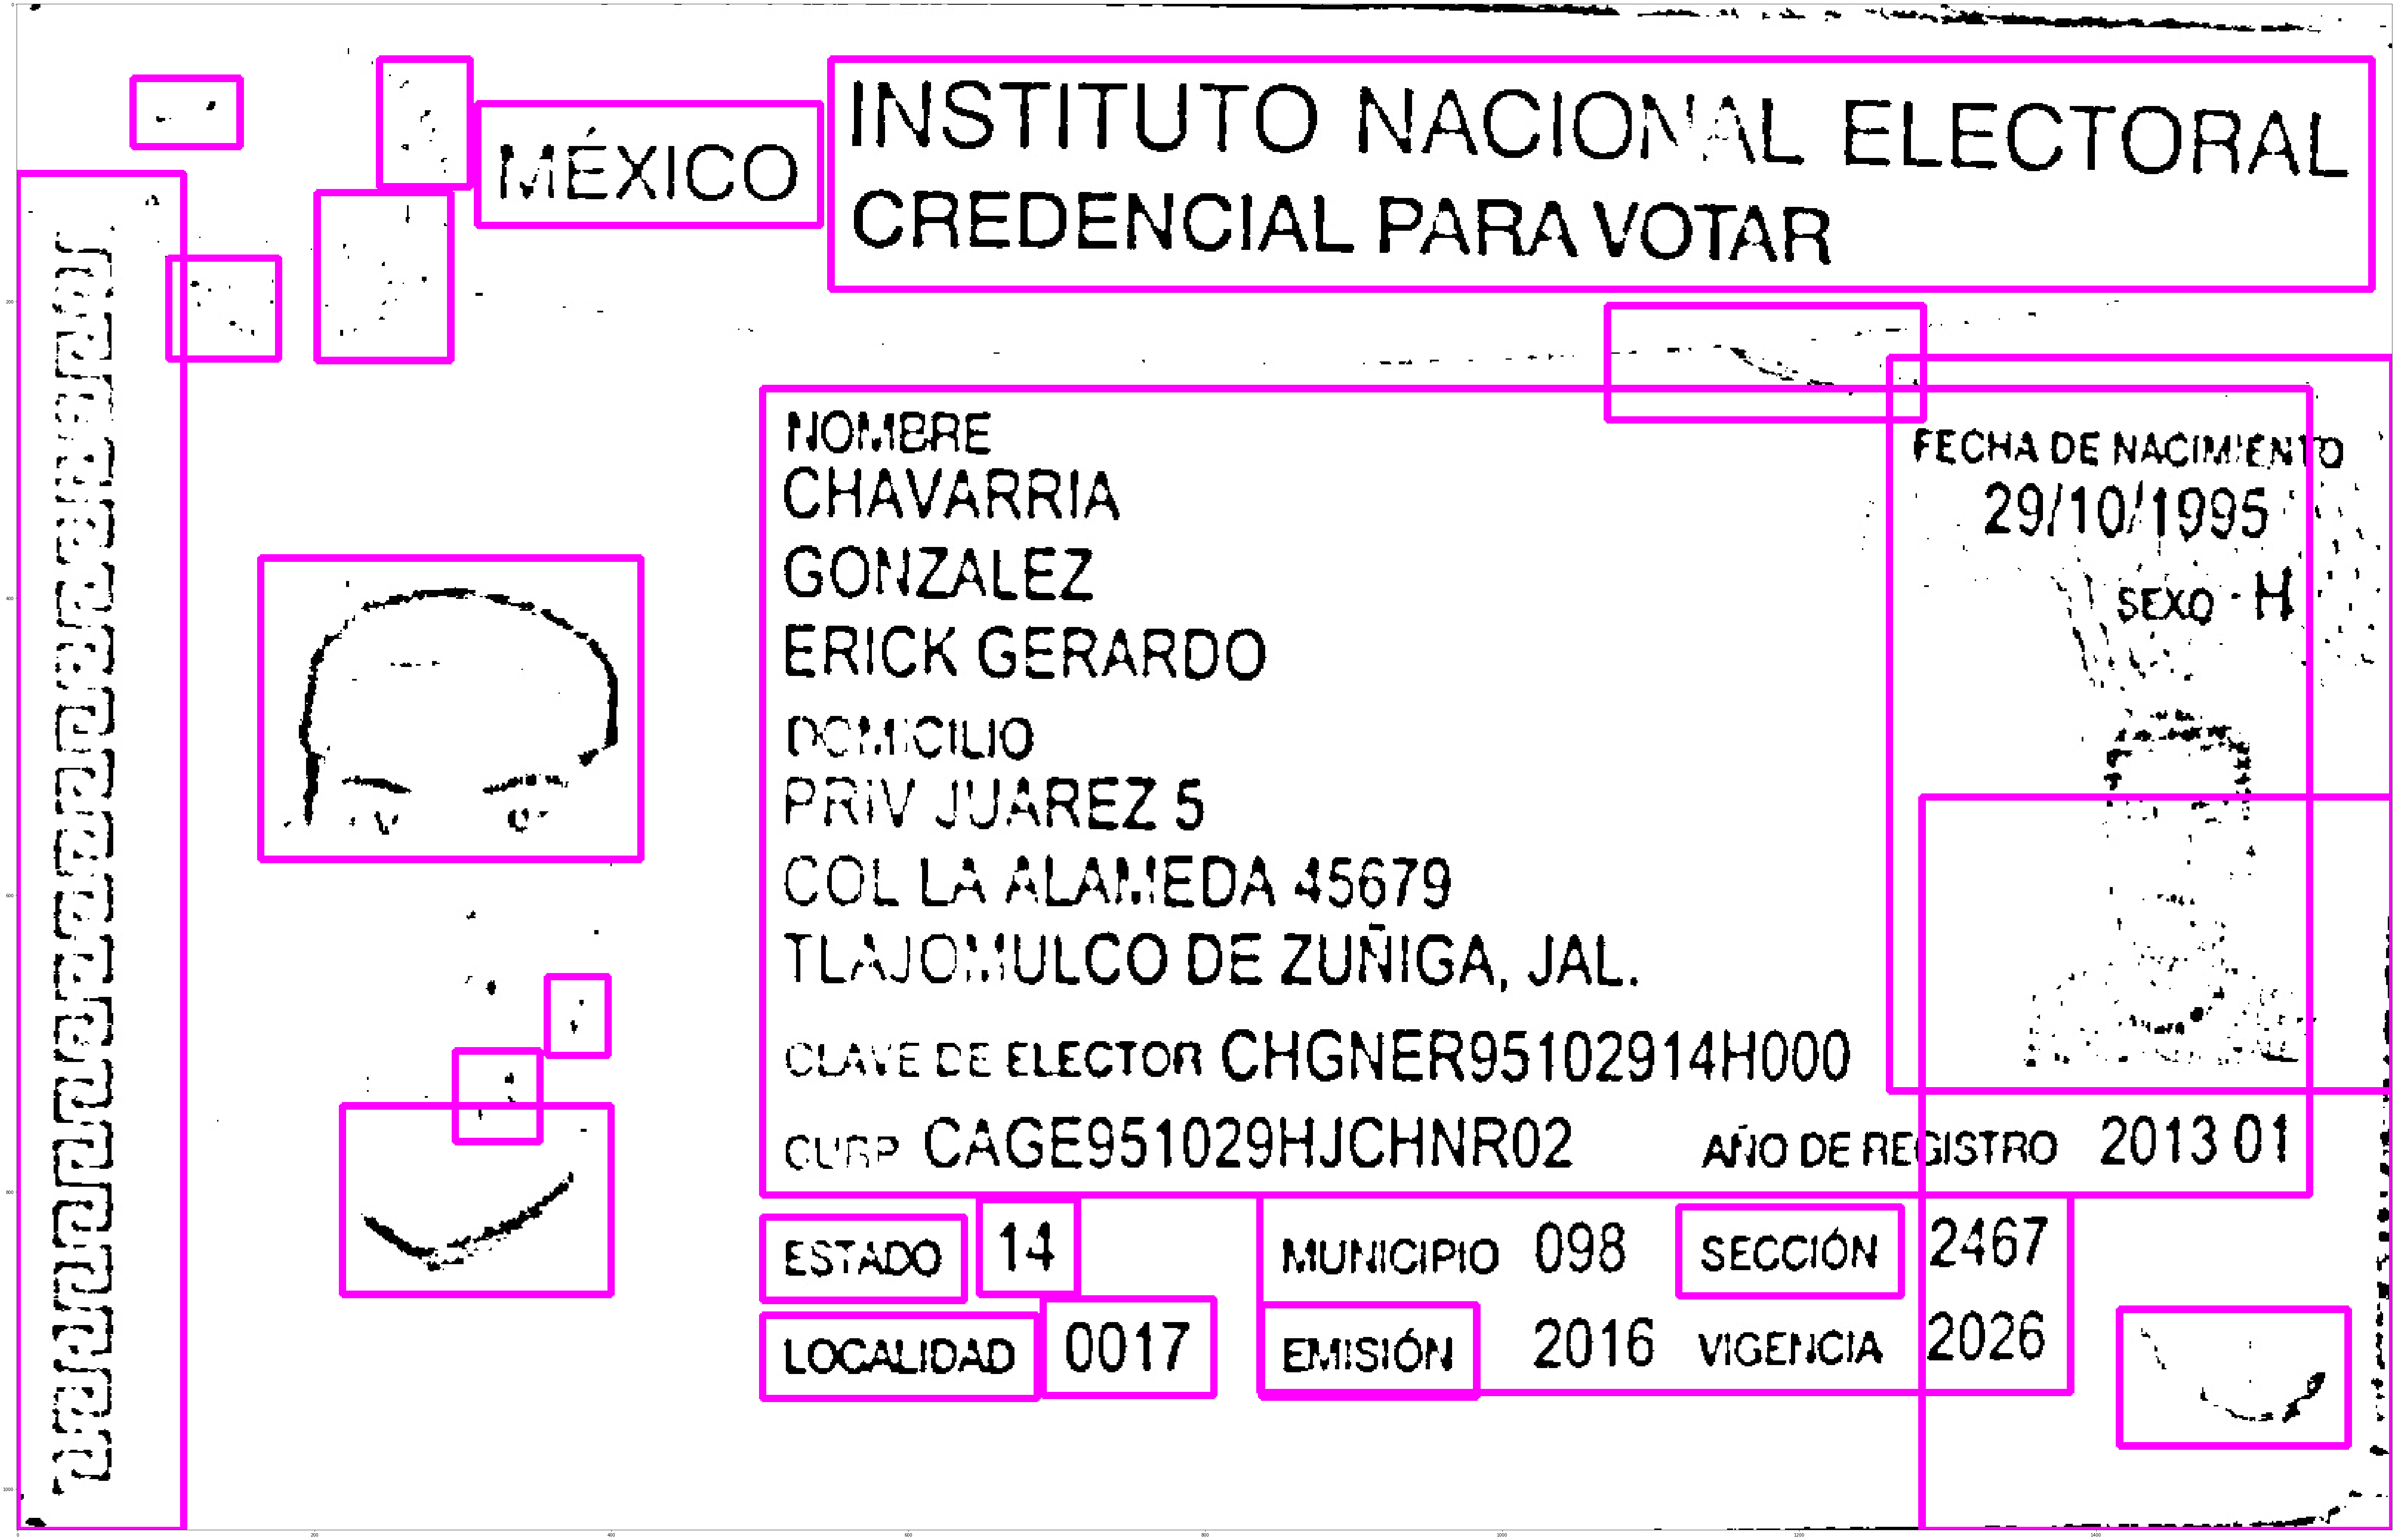

In [244]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img = cv.imread('/content/image-with-regions.png',0)
kernel = np.ones((5,5),np.uint8)
closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)
plt.figure(figsize=(100,100))
plt.imshow(image)

#5. Morphological Gradient
#####It is the difference between dilation and erosion of an image. The result will look like the outline of the object.

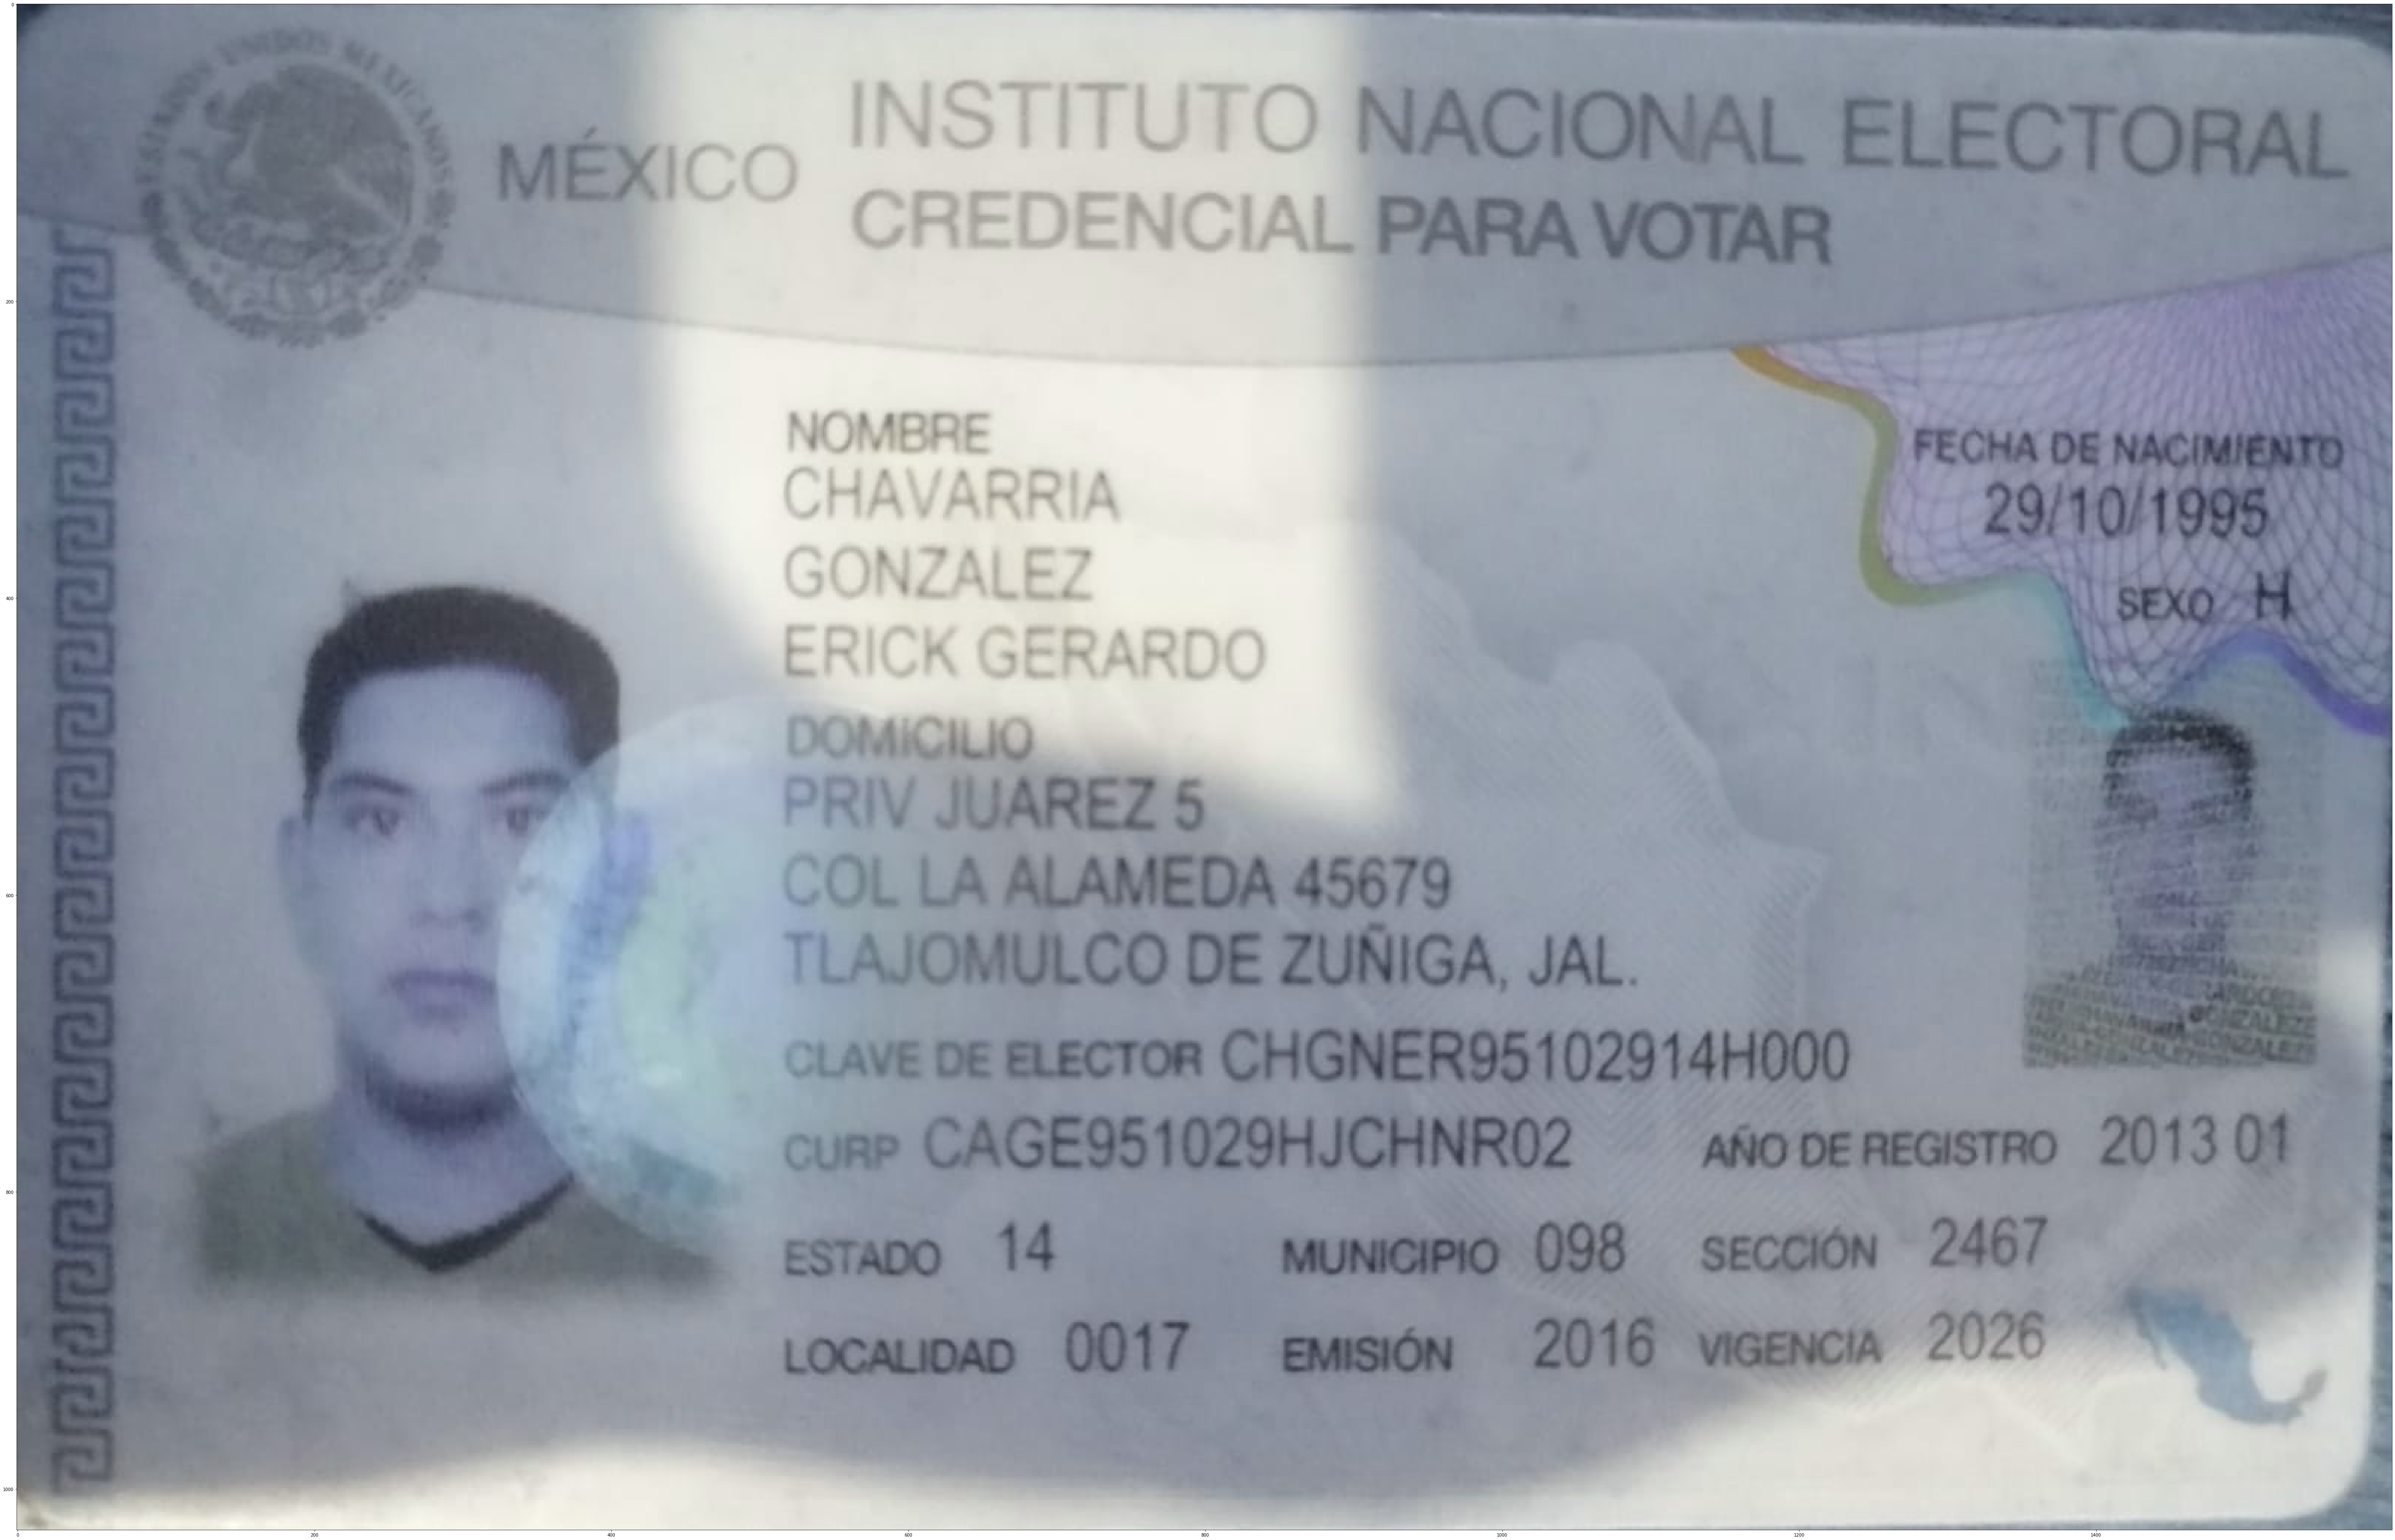

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img = cv.imread('/content/image-with-regions.png',0)
kernel = np.ones((5,5),np.uint8)
gradient = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel)
plt.figure(figsize=(100,100))
plt.imshow(image)

#6. Top Hat
#####It is the difference between input image and Opening of the image. Below example is done for a 9x9 kernel

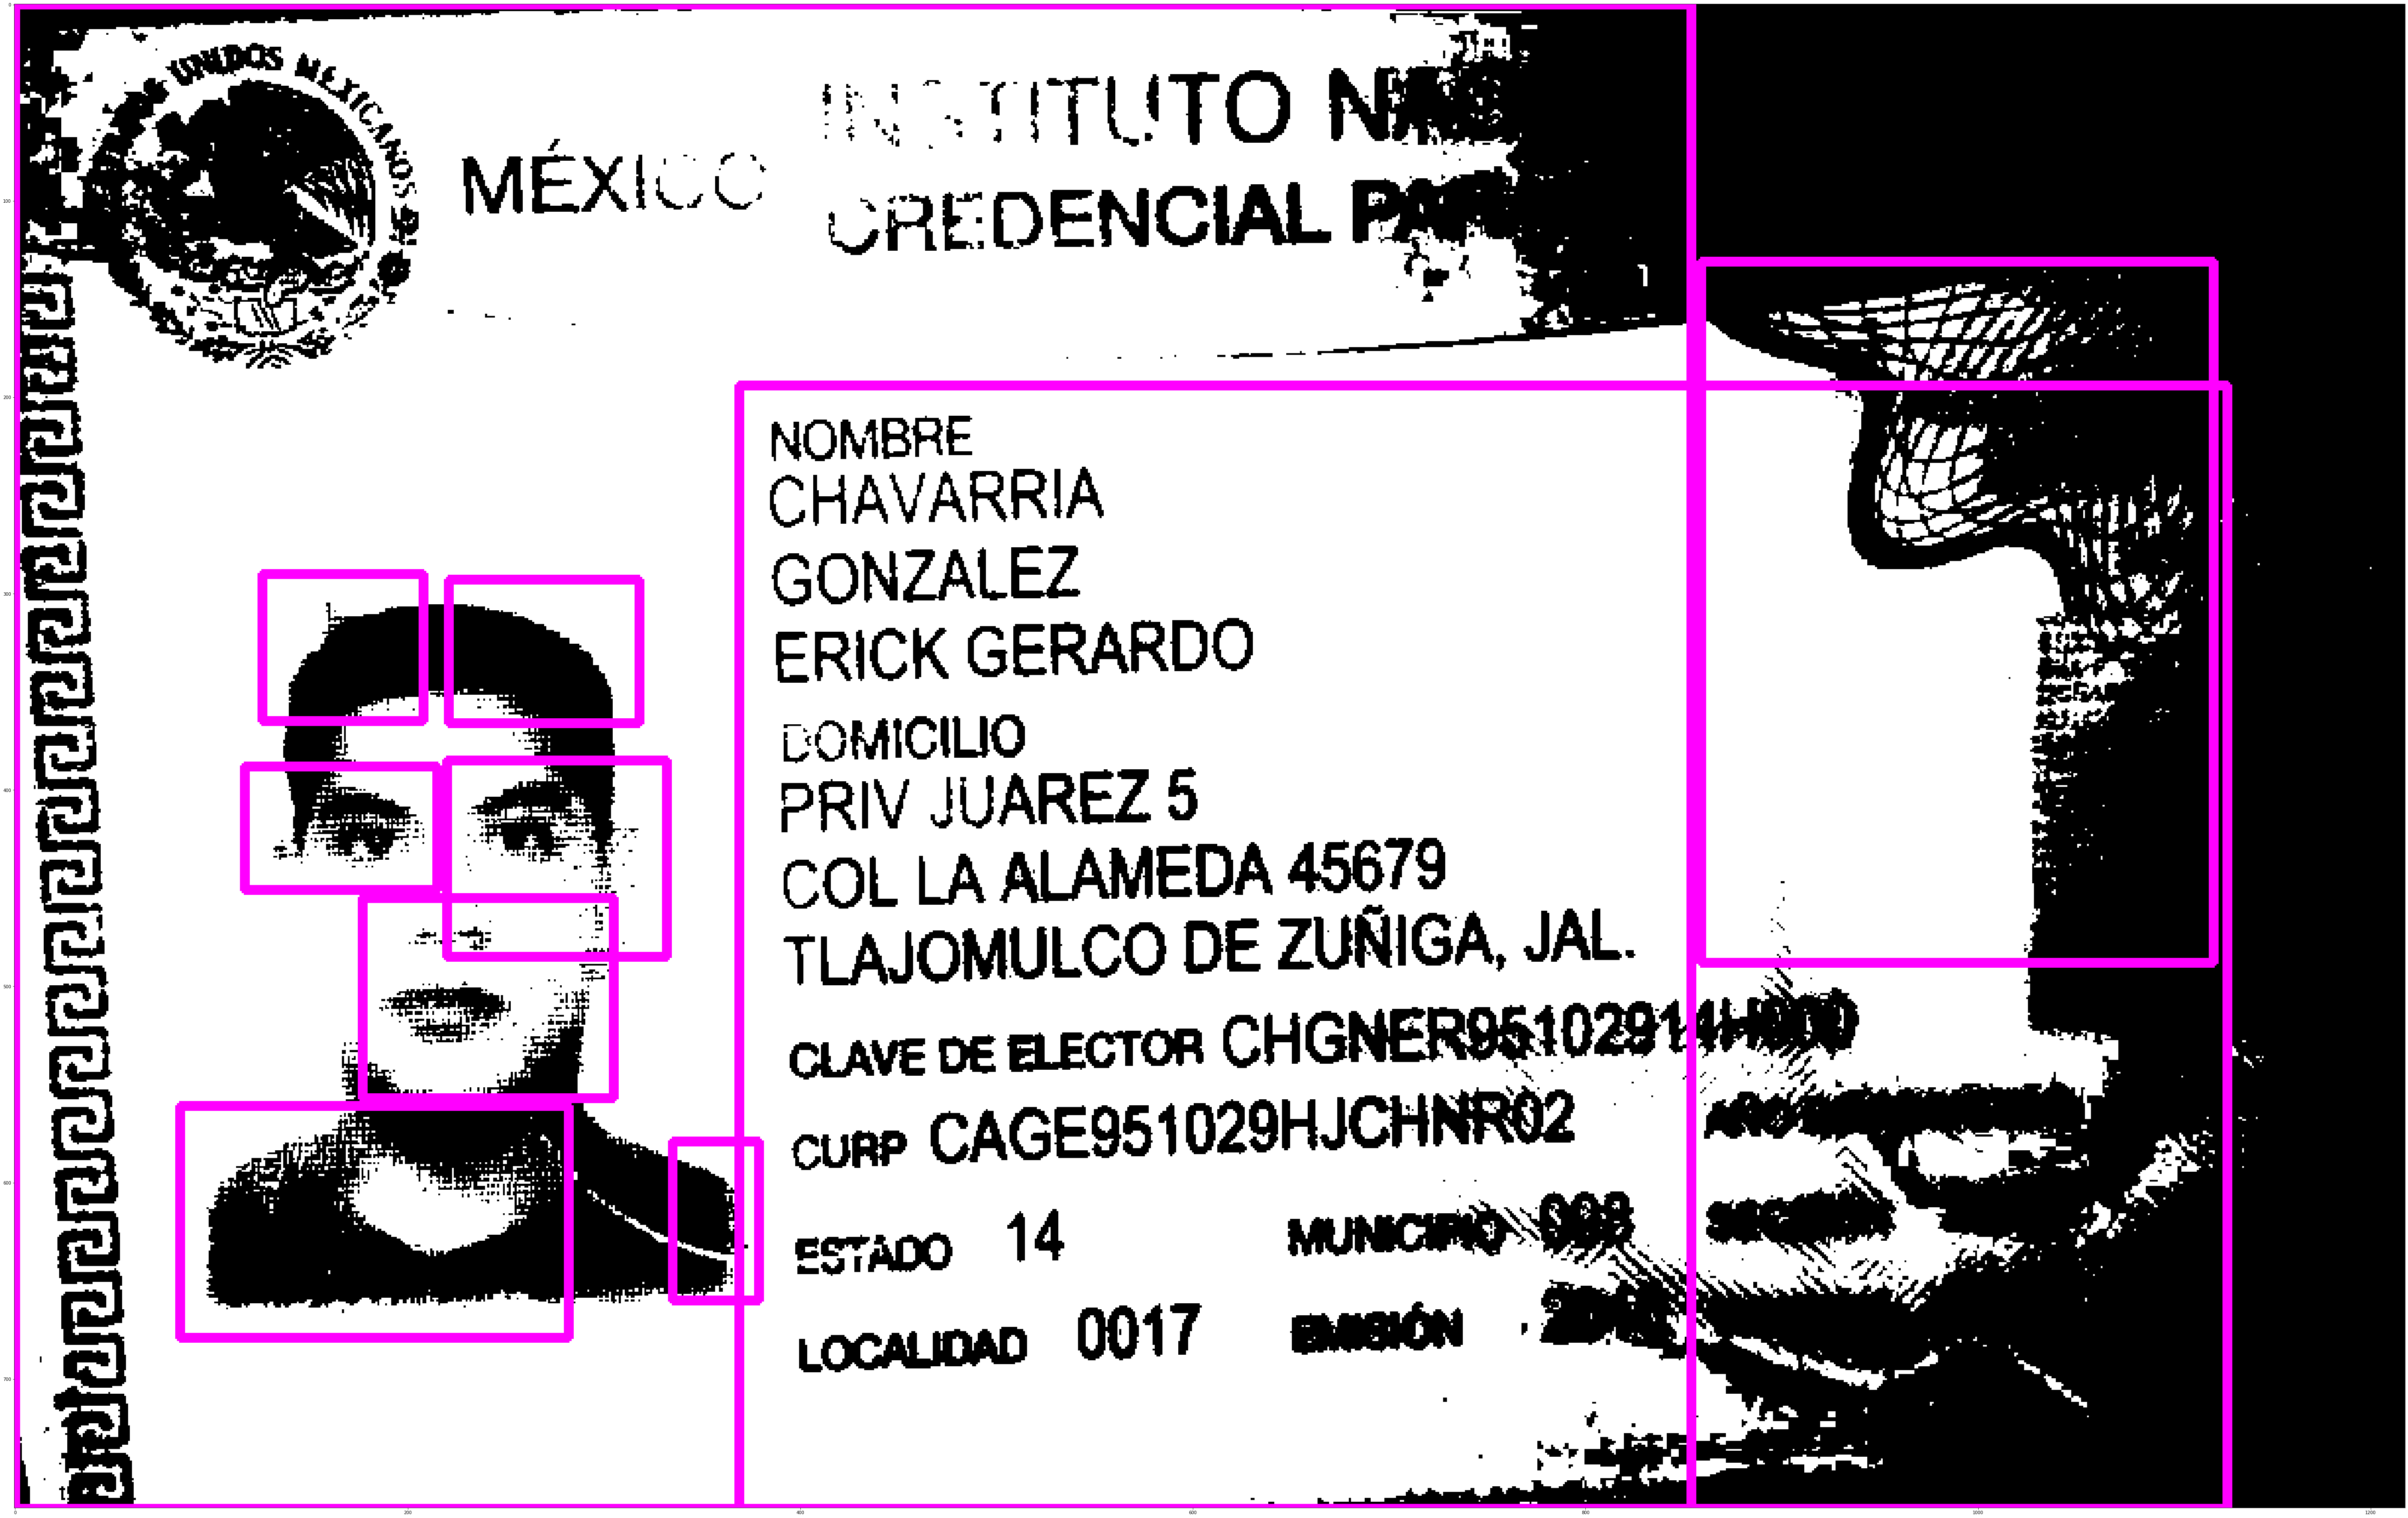

In [169]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img = cv.imread('/content/image-with-regions.png',0)
kernel = np.ones((5,5),np.uint8)
tophat = cv.morphologyEx(img, cv.MORPH_TOPHAT, kernel)
plt.figure(figsize=(100,100))
plt.imshow(image)

#7. Black Hat
#####It is the difference between the closing of the input image and input image.

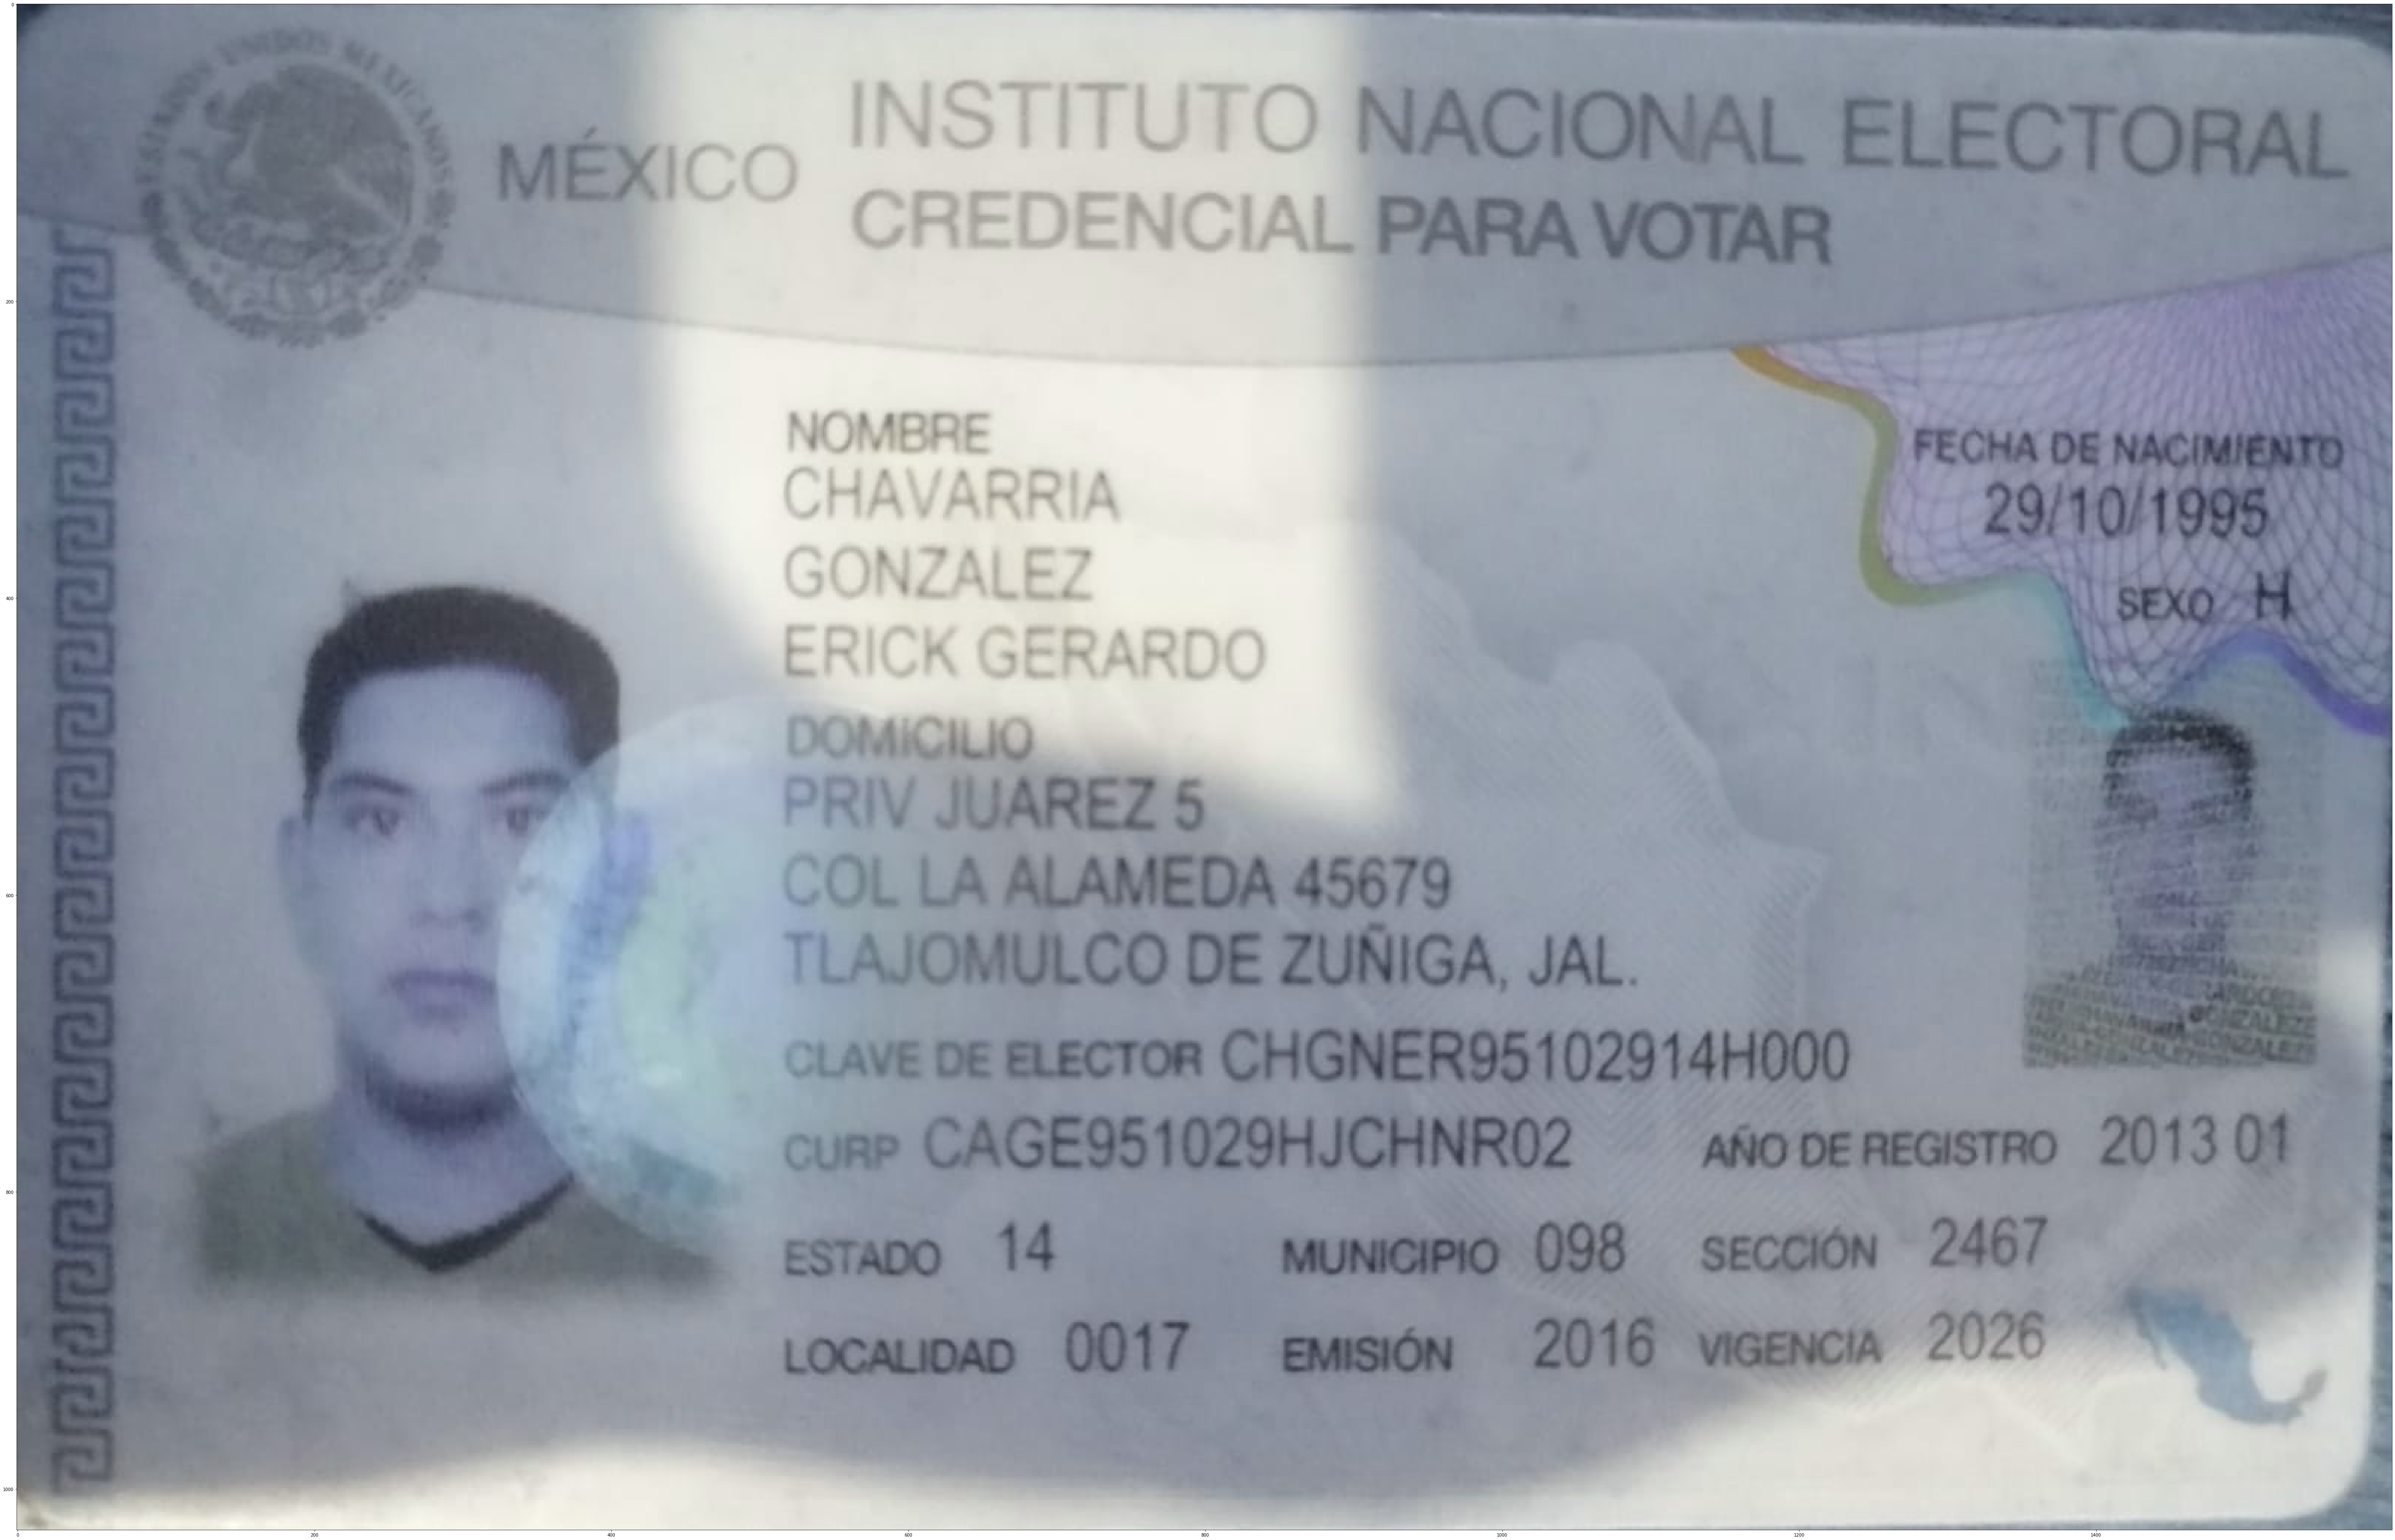

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img = cv.imread('/content/image-with-regions.png',0)
kernel = np.ones((5,5),np.uint8)
blackhat = cv.morphologyEx(img, cv.MORPH_BLACKHAT, kernel)
plt.figure(figsize=(100,100))
plt.imshow(image)

#OCR Process

In [260]:
#!pip install pytesseract
#!sudo apt install tesseract-ocr

In [261]:
import cv2 
import pytesseract
import matplotlib.pyplot as plt
from IPython.display import Image
from pylab import rcParams
import numpy as np
from pprint import pprint
from pytesseract import Output

In [262]:
rcParams['figure.figsize'] = 8, 16

In [263]:
file_name = "/content/image-with-regions.png"

In [264]:
img = cv2.imread(file_name)

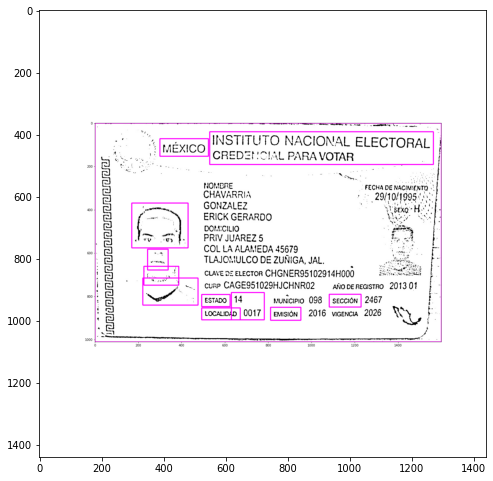

In [265]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [266]:
text_out = pytesseract.image_to_string(img)

In [267]:
text_out

' \n\noy : INSTITUTO NACIONAL ELECTORAL .\nes CREDEHCIAL PARA VOTAR\n\neh\n\n \n\n200\n\n   \n \n\nNOMBRE FECHA DE NACIMIENTQ ©\nCHAVARRIA ni / oe\nGONZALEZ beg Het\nERICK GERARDO\n\nDOMCILIO\n\nPRIV JUAREZ 5\n\nCOL LA ALAMEDA 45679\nTLAJOMULCO DE ZUNIGA, JAL. .\nCLAVE os ELECTOR CHGNER95102914H000\ncure CAGE951029HJCHNRO2 ANlODEREGISTRO 2013 01\n\n4 MUNICIPIO 098 2467\n‘tocauiodo |0017 | [enision] 2016 cerca 2026 YY v)\n\n400\n\n600\n\n800\n\n  \n\nIARIVIBIOIRTAoUeAweeeT\n\n \n\n \n\n \n\n3000\n°\n\n200 “400 600 800 3000 1200 1400\n\x0c'

In [268]:
dir(pytesseract)

['ALTONotSupported',
 'Output',
 'TSVNotSupported',
 'TesseractError',
 'TesseractNotFoundError',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'get_languages',
 'get_tesseract_version',
 'image_to_alto_xml',
 'image_to_boxes',
 'image_to_data',
 'image_to_osd',
 'image_to_pdf_or_hocr',
 'image_to_string',
 'pytesseract',
 'run_and_get_output']

In [269]:
d = pytesseract.image_to_data(img, output_type=Output.DICT)

In [270]:
d.keys()

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])

#RESULT

In [271]:
d["text"]

['',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 'oy',
 ':',
 'INSTITUTO',
 'NACIONAL',
 'ELECTORAL',
 '.',
 '',
 'es',
 'CREDEHCIAL',
 'PARA',
 'VOTAR',
 '',
 '',
 '',
 'eh',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 '200',
 '',
 '',
 '',
 '   ',
 '',
 ' ',
 '',
 '',
 '',
 'NOMBRE',
 'FECHA',
 'DE',
 'NACIMIENTQ',
 '©',
 '',
 'CHAVARRIA',
 'ni',
 '/',
 'oe',
 '',
 'GONZALEZ',
 'beg',
 'Het',
 '',
 'ERICK',
 'GERARDO',
 '',
 '',
 'DOMCILIO',
 '',
 '',
 'PRIV',
 'JUAREZ',
 '5',
 '',
 '',
 'COL',
 'LA',
 'ALAMEDA',
 '45679',
 '',
 'TLAJOMULCO',
 'DE',
 'ZUNIGA,',
 'JAL.',
 '.',
 '',
 'CLAVE',
 'os',
 'ELECTOR',
 'CHGNER95102914H000',
 '',
 'cure',
 'CAGE951029HJCHNRO2',
 'ANlODEREGISTRO',
 '2013',
 '01',
 '',
 '',
 '',
 '4',
 'MUNICIPIO',
 '098',
 '2467',
 '',
 '‘tocauiodo',
 '|0017',
 '|',
 '[enision]',
 '2016',
 'cerca',
 '2026',
 'YY',
 'v)',
 '',
 '',
 '',
 '400',
 '',
 '',
 '',
 '600',
 '',
 '',
 '',
 '800',
 '',
 '',
 '',
 '  ',
 '',
 '',
 '',
 'IARIVIBIOIRTAoUeAweeeT',
 '',
 '',
 '',
 ' ',
 '